# Logistic Regression
#### - let us try binary classification with the below data

In [14]:
exam=[90,86,72,80,57,68,64,75]
grade=[1,1,1,1,0,0,0,0]

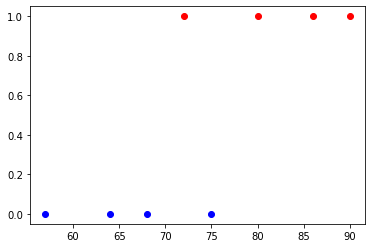

In [15]:
import numpy as np
import matplotlib.pyplot as plt
plt.plot(exam,[i if i==1 else None for i in grade],'ro')
plt.plot(exam,[i if i==0 else None for i in grade],'bo')

## Sigmoid Function
#### - Let us fit the data 

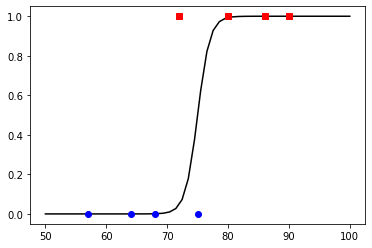

In [16]:
x=np.linspace(50,100)
def sig(x,w,b):
    return 1.0/(1+np.exp(-w*x+b)) #sigmond ftn. : 1/(1+exp(-x))
plt.plot(x,sig(x,1,75),'k-')
plt.plot(exam,[i if i==1 else None for i in grade],'rs')
plt.plot(exam,[i if i==0 else None for i in grade],'bo')

### How to find the best fitted line?
#### Maximum Likelihood Estimation (MLE) + Gradient Descent Method (GD)
개별 데이터들이 독립적이라고 가정하면 최대 가능도(maximum likelihood)는 다음처럼 주어진다.$$ L(w)= \prod_{i} f_w(x_i)^{y_i} [1-f_w(x_i) ]^{1-y_i}, $$여기에서 $f$는 모델 예측값, $y$는 실제 레이블을 의미한다. 위의 식을 살펴보면 만약 $y_i=1$이면 $f_w$이고 $y_i=0$이면 $(1-f_w)$로 주어지는 값임을 알 수 있다. 따라서 다음의 식을 최대화하는 $w$를 찾으면 좋은 fitting을 구할 수 있다. 위의 식을 그대로 최대화해도 되지만 계산의 편의를 위해 $-\log$를 취해서 log likelihood를 최소화하는 과정을 통해 $w$를 찾아보자.

log likelihood 함수는 다음처럼 주어진다.$$
-\log L(w)= -\sum_i [ y_i \log f_w + (1-y) \log (1-f_w) ].$$이 식을 cross entropy (CE) 혹은 log loss function 이라고 부른다. 이 함수가 최소가 되려면 미분값이 $0$이 되는 조건을 만족하면 해야 한다.$$\begin{align}
-\frac{\partial \log L(w)}{\partial w} &amp;= -\frac{\partial }{\partial w}  y_i \log f_w + (1-y_i) \log (1-f_w)  \\
&amp;= -\frac{y_i }{f_w} \frac{\partial f_w}{\partial w} + \frac{1-y_i }{1-f_w} \frac{\partial f_w}{\partial w} \\
&amp;= -\frac{y_i }{f_w} f_w(1-f_w)x_i + \frac{1-y_i }{1-f_w} f_w(1-f_w)x_i \\
&amp;= -\frac{y_i }{f_w} f_w(1-f_w)x_i + \frac{1-y_i }{1-f_w} f_w(1-f_w)x_i \\
&amp;= (f_w - y_i)x_i =0. \end{align}$$

아쉽게도 $w$를 해석적으로 구할 수 있는 방법은 없지만 위의 결과와 경사하강법(Gradient Descent method)를 활용하면 손쉽게 최소값을 찾을 수 있다. 즉 다음의 식을 따라 오차(cross entropy)를 줄이는 방향으로 $w$의 값을 바꾸면서 오차가 최소값까지 도달할 때까지 위의 계산을 반복한다.$$\begin{align} w&amp;=w- \eta \frac{\partial }{\partial w}[-\log L(w)]\\
&amp;=w+\eta \sum_i (y_i - f_w )x_i \end{align}$$

## Scikit-learn Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
X=[[i] for i in exam]
y=grade
log_reg=LogisticRegression(solver='lbfgs')
log_reg.fit(X,y)

LogisticRegression()

In [18]:
log_reg.coef_ , log_reg.intercept_

(array([[0.32895009]]), array([-24.25957919]))

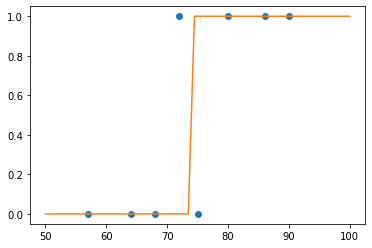

In [19]:
x=[[i] for i in np.linspace(50,100,50)]
plt.plot(X,y,'o')
plt.plot(x,log_reg.predict(x))

In [20]:
log_reg.score(X, y)

0.75

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, log_reg.predict(X))
# read carefully!
# ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

array([[3, 1],
       [1, 3]], dtype=int64)

- You can improve your model by setting and adjusting parameters. Try it!
### Softmax Regression (Multinomial Logistic Regression)
- 소프트맥스 회귀 혹은 다중로지스틱 회귀는 딥러닝을 배울 때 함께 소개하도록 하겠습니다.

# Support Vector Machine (SVM)

서포트 벡터 머신은 매우 강력한 분류 기법입니다. 또한 핵심 개념은 매우 간단하므로 쉽게 익힐 수 있습니다. 다음의 예시를 생각해보자.

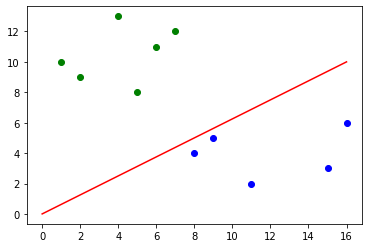

In [22]:
import numpy as np
import matplotlib.pyplot as plt

green=[[1,4,6,2,5,7],[10,13,11,9,8,12]]
blue=[[11,9,8,15,16],[2,5,4,3,6]]
plt.plot(green[0],green[1],'go')
plt.plot(blue[0],blue[1],'bo')
plt.plot([0,16],[0,10],'r-')

두 개의 집단(class)를 나누는 간단한 방법을 생각해보자. 두 개의 집단 사이를 가로지르는 선을 하나 그어서 그 선 위에 있는 점들은 녹색, 아래에 있는 점은 파란색 집단으로 생각하면 손쉽게 분류할 수 있다. 그러면 어떻게 두 집단을 가르는 최적의 결정 경계(decision boundary)를 찾을 수 있을까? 임의의 선이 그어져 있다고 가정해보자. 그러면 각각의 집단에서 직선에 가장 가까운 점과 직선 사이에 거리를 마진(margin)이라고 부르기로 하자. 그러면 간단한 해법은 마진을 최대로 만드는 직선을 찾는 것이다. 위의 간단한 방법을 통해 $wx+b$ 결정 경계를 찾는 방법을 서포트 벡터 머신이라고 부른다. 서포트 벡터는 직선에 가장 가까운 집을 지나가는 결정경계와 평행한 선을 이야기하며 이 벡터가 결정 경계를 지지(support)해주므로 다음과 같은 이름으로 부른다. 즉 서포트 벡터와 결정경계 사이가 마진이 된다.

### Maximizing the margin

In [23]:
from sklearn.svm import SVC # support vector classification
X=np.concatenate((np.transpose(green),np.transpose(blue))) # np.concatenate(a,b) - a,b를 합쳐라. / #np.transpose - 행과 열을 바꿔라.
y=[1,1,1,1,1,1,0,0,0,0,0]

In [24]:
svc=SVC(kernel='linear')
svc.fit(X,y)
svc.decision_function(X)

array([ 2.71399982,  2.71448661,  1.57167583,  2.14259443,  0.99994591,
        1.5718381 , -2.42848643, -0.99989182, -1.00005409, -3.28518886,
       -2.71345894])

In [25]:
svc.score(X,y)

1.0

In [26]:
svc.predict(X)

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0])

In [34]:
svc.coef_[0,1],svc.intercept_[0] #?????

(0.28578382769230753, 0.14178310564102867)

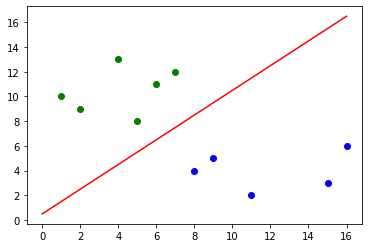

In [41]:
plt.plot(green[0],green[1],'go')
plt.plot(blue[0],blue[1],'bo')
x=np.linspace(0,16,20) #0부터 16까지 20개 간격으로
a=-svc.coef_[0,0]/svc.coef_[0,1] #???????
b=svc.intercept_[0]/svc.coef_[0,1]  #??????? # intercept_ - 절편 / # coef_ - 기울기
plt.plot(x,a*x+b,'r-')

## Nonlinear Support Vector Machine

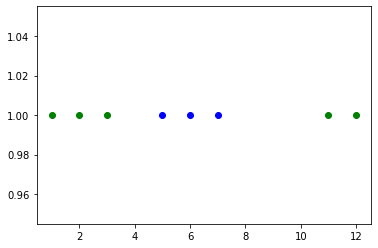

In [18]:
green=[1,2,3,11,12]
blue=[5,6,7]
plt.plot(blue,[1 for i in blue],'bo')
plt.plot(green,[1 for i in green],'go')

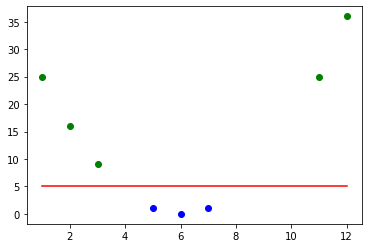

In [43]:
green=[1,2,3,11,12]
blue=[5,6,7]
plt.plot(blue,[(i-6)**2 for i in blue],'bo')  #???????
plt.plot(green,[(i-6)**2 for i in green],'go')  #???????
plt.plot(green,[5 for i in green],'r-')  #???????

### kernel trick

C:\Users\qkrgk\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


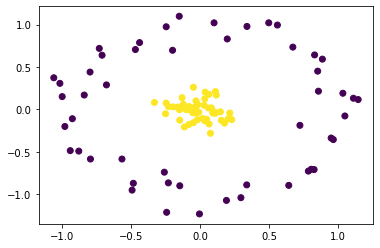

In [20]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=0.1, noise=0.1)

# classifier
clf=SVC(kernel='linear')
clf.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=y)

0.7

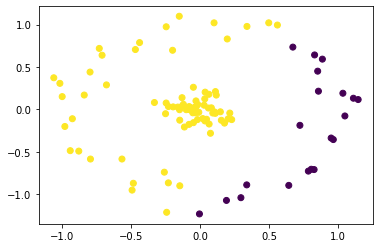

In [21]:
plt.scatter(X[:,0],X[:,1],c=clf.predict(X))
clf.score(X,y)

1.0

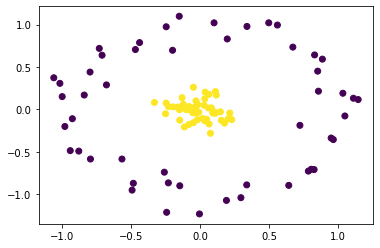

In [22]:
clf2=SVC(kernel='rbf',gamma='auto')
clf2.fit(X,y)
plt.scatter(X[:,0],X[:,1],c=clf2.predict(X))
clf2.score(X,y)

### How to find parameters
- see references such as:
1. https://scikit-learn.org/stable/modules/svm.html
2. https://en.wikipedia.org/wiki/Support_vector_machine

# Iris(분꽃)

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris() # 분꽃

In [24]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [25]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [26]:
iris.target_names # 3종류의 분꽃 분류하기

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [27]:
iris.feature_names 
# sepal : 꽃받침
# petal : 꽃잎

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### Logistic Regression

In [28]:
X=[[i] for i in iris.data[:,2]] # 꽃잎 길이
y=[1 if i==2 else 0 for i in iris.target] # virginica이면 1, 아니면 0

In [29]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(solver='lbfgs')
log_reg.fit(X,y)

LogisticRegression()

In [30]:
log_reg.score(X,y)

0.9533333333333334

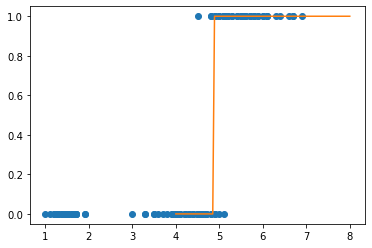

In [31]:
x=[[i] for i in np.linspace(4,8,100)]
plt.plot(X,y,'o')
plt.plot(x,log_reg.predict(x))

### Support Vector Machine

0.9533333333333334

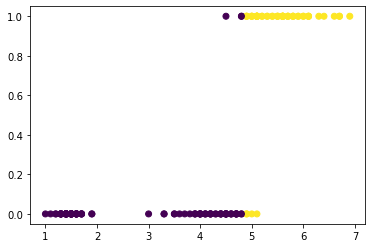

In [32]:
# classifier
from sklearn.svm import SVC # support vector classification

svm=SVC(kernel='rbf',gamma='auto')
svm.fit(X,y)
plt.scatter(X,y,c=svm.predict(X))
svm.score(X,y)

In [33]:
X=iris["data"] 
y=iris["target"] # setosa=0, versicolor=1, virginica=2

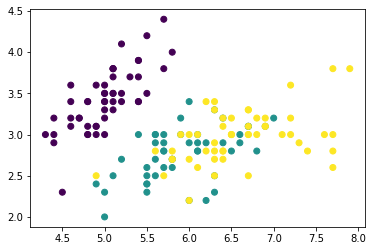

In [34]:
svm=SVC(kernel='rbf',gamma='auto')
svm.fit(X,y)
svm.score(X,y)
plt.scatter(X[:,0],X[:,1],c=svm.predict(X))

In [35]:
svm.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [36]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [37]:
svm.score(X,y)

0.9866666666666667